[array([[[408, 158]],

       [[407, 159]],

       [[406, 159]],

       [[405, 160]],

       [[404, 160]],

       [[402, 162]],

       [[402, 163]],

       [[401, 164]],

       [[401, 167]],

       [[402, 168]],

       [[402, 169]],

       [[407, 174]],

       [[408, 174]],

       [[409, 175]],

       [[411, 175]],

       [[412, 176]],

       [[414, 176]],

       [[415, 177]],

       [[418, 177]],

       [[419, 178]],

       [[428, 178]],

       [[429, 177]],

       [[433, 177]],

       [[434, 176]],

       [[436, 176]],

       [[437, 175]],

       [[438, 175]],

       [[439, 174]],

       [[439, 173]],

       [[440, 172]],

       [[440, 167]],

       [[435, 162]],

       [[434, 162]],

       [[433, 161]],

       [[431, 161]],

       [[430, 160]],

       [[429, 160]],

       [[428, 159]],

       [[425, 159]],

       [[424, 158]]], dtype=int32), array([[[495, 109]],

       [[494, 110]],

       [[493, 110]],

       [[492, 111]],

       [[491, 111

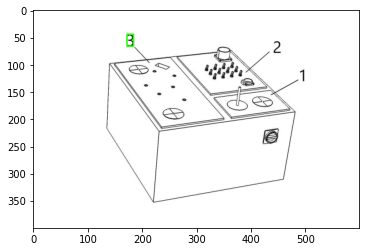

In [45]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

image=cv2.imread("body/panel-prospective.jpg")
#print(image.shape)
color=(36,255,12)
thickness=2

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
if 1:
    canny = cv2.Canny(blurred, 120, 255, 1)
else:
    ret,canny = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    # NOT WORKING
    
cnts = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
print(cnts)
# Iterate thorugh contours and draw rectangles around contours
if 0:
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x,y), (x+w,y+h), color, thickness)
        # "WORKING"
else:
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(image,[box],0,color,thickness)
        # STILL I THINK NOT WORKING
        
plt.imshow(image)
plt.show()

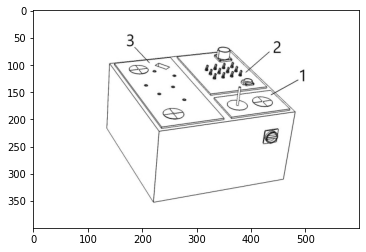

In [18]:
import cv2
import numpy as np
#from shapeDetector import ShapeDetector
import imutils
from matplotlib import pyplot as plt

image=cv2.imread("body/panel-prospective.jpg")
if 1:
    kernel = np.ones((30,30),np.uint8)
else:
    kernel = cv2.getStructuringElement( cv2.MORPH_RECT, ( 7, 7) )   

if 0:
    image = cv2.erode(image,kernel,iterations = 10)
    image = cv2.dilate(image,kernel,iterations = 10)
else:
    imgrect = cv2.morphologyEx( image, cv2.MORPH_CLOSE, kernel )
    
plt.imshow(image)
plt.show()